# 1. Data Preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')


In [2]:
movies = pd.DataFrame()
for i in range(1, 8):
    temp = pd.read_pickle(f'data/movies_{i}.pickle')
    movies = pd.concat([movies, temp])

In [3]:
movies.columns

Index(['title', 'rating', 'mpaa', 'raters', 'genres', 'director', 'writers',
       'stars', 'release date', 'origin', 'language', 'budget',
       'opening weekend', 'gross usa', 'gross ww', 'runtime(min)',
       'production co'],
      dtype='object')

In [4]:
# Drop movies with duplicated 'title'
movies.drop_duplicates(subset=['title'], inplace=True)

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3127 entries, 0 to 151
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            3127 non-null   object        
 1   rating           3127 non-null   object        
 2   mpaa             3122 non-null   object        
 3   raters           3127 non-null   float64       
 4   genres           3127 non-null   object        
 5   director         3127 non-null   object        
 6   writers          3127 non-null   object        
 7   stars            3127 non-null   object        
 8   release date     3124 non-null   datetime64[ns]
 9   origin           3127 non-null   object        
 10  language         3127 non-null   object        
 11  budget           2721 non-null   float64       
 12  opening weekend  2915 non-null   float64       
 13  gross usa        2936 non-null   float64       
 14  gross ww         3048 non-null   float64 

In [6]:
# We decided not to include mpaa in our data set
movies.drop('mpaa', axis=1, inplace = True)

In [7]:
# Reorganize column names to remove spaces
movies.columns=['title', 'rating', 'raters', 'genres', 'director', 'writers', 'stars', 'release', 'origin', 'language', 'budget', 'opening', 'grossusa', 'grossww', 'runtime', 'production']

In [8]:
# Set indexes as 'title'
movies.set_index('title', inplace=True)

In [9]:
# Change 'rating' datatype to float
movies['rating'] = movies['rating'].astype(float)

In [10]:
# null alanları mean ile değiştirdiğimizde modelin performansı kötüleşti, o yüzden atmaya karar verdik !
# movies['budget'].fillna(movies['budget'].mean(), inplace=True)

In [11]:
# Remove null values from the dataset since no estimation is desired for below features
movies.dropna(subset=['budget', 'opening', 'grossusa', 'grossww'],inplace=True)

In [12]:
movies.head(4)

,rating,raters,genres,director,writers,stars,release,origin,language,budget,opening,grossusa,grossww,runtime,production
title,,,,,,,,,,,,,,,
Spider-Man: No Way Home,8.5,570000.0,"[Action, Adventure, Fantasy, Sci-Fi]",Jon Watts,"[Chris McKenna, Erik Sommers, Stan Lee(based o...","[Tom Holland, Zendaya, Benedict Cumberbatch]",2021-12-17,[United States],[English],200000000.0,260138569.0,802704167.0,1.890704e+09,148,"[Columbia Pictures, Pascal Pictures, Marvel St..."
Nightmare Alley,7.1,104000.0,"[Crime, Drama, Thriller]",Guillermo del Toro,"[Guillermo del Toro(screenplay by), Kim Morgan...","[Bradley Cooper, Cate Blanchett, Toni Collette]",2022-02-04,"[United States, Mexico, Canada]","[English, French]",60000000.0,2811703.0,11338107.0,3.869248e+07,150,"[Fox Searchlight Pictures, Searchlight Picture..."
West Side Story,7.3,63000.0,"[Crime, Drama, Musical, Romance]",Steven Spielberg,"[Tony Kushner(screenplay by), Arthur Laurents(...","[Ansel Elgort, Rachel Zegler, Ariana DeBose]",2021-12-10,[United States],"[English, Spanish]",100000000.0,10574618.0,38523412.0,7.554621e+07,156,"[20th Century Studios, Amblin Entertainment, A..."
Dune: Part One,8.1,534000.0,"[Action, Adventure, Drama, Sci-Fi]",Denis Villeneuve,"[Jon Spaihts(screenplay by), Denis Villeneuve(...","[Timothée Chalamet, Rebecca Ferguson, Zendaya]",2021-10-22,"[Canada, United States]","[English, Mandarin]",165000000.0,41011174.0,108315210.0,4.006592e+08,155,"[Warner Bros., Legendary Entertainment, Villen..."


In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2654 entries, Spider-Man: No Way Home to Jab Tak Hai Jaan
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rating      2654 non-null   float64       
 1   raters      2654 non-null   float64       
 2   genres      2654 non-null   object        
 3   director    2654 non-null   object        
 4   writers     2654 non-null   object        
 5   stars       2654 non-null   object        
 6   release     2651 non-null   datetime64[ns]
 7   origin      2654 non-null   object        
 8   language    2654 non-null   object        
 9   budget      2654 non-null   float64       
 10  opening     2654 non-null   float64       
 11  grossusa    2654 non-null   float64       
 12  grossww     2654 non-null   float64       
 13  runtime     2654 non-null   int64         
 14  production  2654 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(1),

In [14]:
movies[movies.release.isna()]

,rating,raters,genres,director,writers,stars,release,origin,language,budget,opening,grossusa,grossww,runtime,production
title,,,,,,,,,,,,,,,
Long Shot,6.8,108000.0,"[Comedy, Romance]",Jonathan Levine,"[Dan Sterling(screenplay by), Liz Hannah(scree...","[Charlize Theron, Seth Rogen, June Diane Raphael]",NaT,"[United States, Canada, Colombia]","[English, Swedish, French, Vietnamese, Russian...",40000000.0,9740064.0,30316271.0,53873809.0,125,"[Summit Entertainment, AG Studios, Canadian Fi..."
Bacheha-Ye aseman,8.2,73000.0,"[Drama, Family, Sport]",Majid Majidi,[Majid Majidi],"[Mohammad Amir Naji, Amir Farrokh Hashemian, B...",NaT,[Iran],[Persian],180000.0,20100.0,933933.0,933933.0,89,[Kanun parvaresh fekri]
Dara iz Jasenovca,8.8,81000.0,"[Drama, War]",Predrag Antonijevic,[Natasa Drakulic],"[Biljana Cekic, Zlatan Vidovic, Anja Stanic]",NaT,[Serbia],"[Serbian, German]",3600000.0,16710.0,52786.0,52786.0,130,"[Dandelion Production Inc, Film Danas, Komuna]"


In [15]:
# Fill in missing release dates manually
movies.loc['Long Shot', 'release'] = datetime.strptime('03-05-2019', '%d-%m-%Y')
movies.loc['Bacheha-Ye aseman', 'release'] = datetime.strptime('22-01-1999', '%d-%m-%Y') 
movies.loc['Dara iz Jasenovca', 'release'] = datetime.strptime('05-02-2021', '%d-%m-%Y') 

In [16]:
# Fill in missing mpaa values manually
# movies[movies.mpaa.isna()]

In [17]:
# movies.loc["Monster's Ball", 'mpaa'] = 'R'
# movies.loc["Koroshiya 1", 'mpaa'] = 'R'
# movies.loc["The Kashmir Files"] = 'R'

In [18]:
# movies.mpaa.nunique()
# Too many unique values for mpaa data

In [19]:
# movies.mpaa.unique()

In [20]:
# # Define a function to organize mpaa data
# def get_mpaa(mpaa):
#     if mpaa == 'Not Rated':
#         return mpaa
#     elif 'Rated' in mpaa:
#         try:
#             return mpaa.split(" ")[1]
#         except:
#             return mpaa
#     else:
#         return mpaa

In [21]:
# movies['mpaa'] = movies['mpaa'].apply(lambda x: get_mpaa(x))

In [22]:
# movies.mpaa.unique()

In [23]:
# # Correct some non-conform mpaa data manually
# movies[movies.mpaa == 'R for crude sexual content, language throughout, drug use and brief bloody images'].mpaa = 'R'

In [24]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2654 entries, Spider-Man: No Way Home to Jab Tak Hai Jaan
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rating      2654 non-null   float64       
 1   raters      2654 non-null   float64       
 2   genres      2654 non-null   object        
 3   director    2654 non-null   object        
 4   writers     2654 non-null   object        
 5   stars       2654 non-null   object        
 6   release     2654 non-null   datetime64[ns]
 7   origin      2654 non-null   object        
 8   language    2654 non-null   object        
 9   budget      2654 non-null   float64       
 10  opening     2654 non-null   float64       
 11  grossusa    2654 non-null   float64       
 12  grossww     2654 non-null   float64       
 13  runtime     2654 non-null   int64         
 14  production  2654 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(1),

# 2. Basic Data Understanding

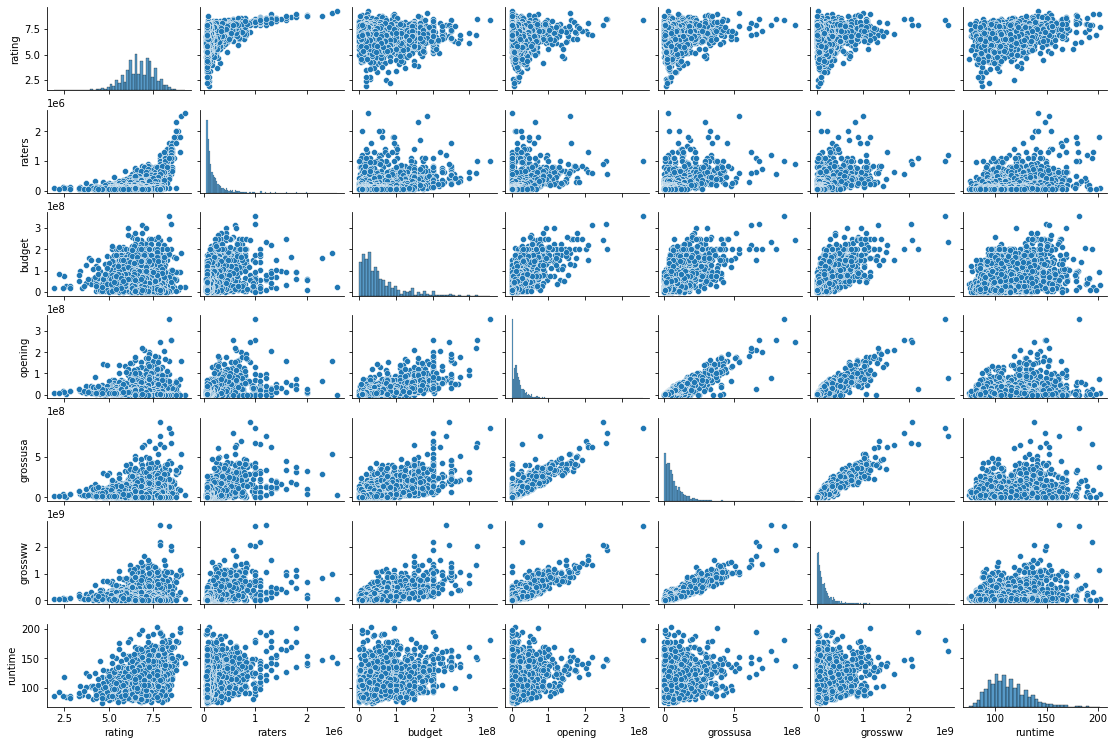

In [25]:
sns.pairplot(movies, height=1.5, aspect=1.5)

In [26]:
movies.corr()

,rating,raters,budget,opening,grossusa,grossww,runtime
rating,1.000000,0.512914,-0.043639,0.008529,0.161079,0.157476,0.393205
raters,0.512914,1.000000,0.327354,0.419631,0.542425,0.536492,0.351069
budget,-0.043639,0.327354,1.000000,0.689117,0.649491,0.711108,0.301919
opening,0.008529,0.419631,0.689117,1.000000,0.886364,0.855220,0.179040
grossusa,0.161079,0.542425,0.649491,0.886364,1.000000,0.938824,0.231317
grossww,0.157476,0.536492,0.711108,0.855220,0.938824,1.000000,0.267627
runtime,0.393205,0.351069,0.301919,0.179040,0.231317,0.267627,1.000000


<AxesSubplot:>

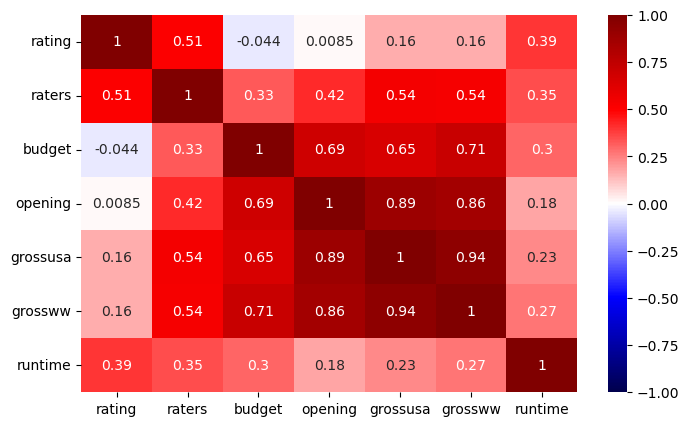

In [27]:
plt.figure(figsize=(8,5), dpi=100)
sns.heatmap(movies.corr(), cmap='seismic', annot=True, vmin=-1, vmax=1)

# 3. Baseline Models
## 3.1. Including all numerical features

#### **Let's first build our first regression model with only the existing numerical features.**

In [28]:
# Stats Model
lm = smf.ols('rating ~ raters + budget + opening + grossusa + grossww + runtime', data=movies)
fit = lm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     311.0
Date:                Sun, 17 Apr 2022   Prob (F-statistic):          3.38e-302
Time:                        14:48:18   Log-Likelihood:                -2680.3
No. Observations:                2654   AIC:                             5375.
Df Residuals:                    2647   BIC:                             5416.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0860      0.080     63.269      0.000       4.928       5.244
raters      1.727e-06   6.94e-08     24.882      0.000    1.59e-06    1.86e-06
budget     -4.543e-09   3.84e-10    -11.836      0.000    -5.3e-09   -3.79e-09
opening     -1.03e-08   1.09e-09     -9.479      0.000   -1.24e-08   -8.17e-09
grossusa    1.933e-09   4.98e-10      3.882      0.000    9.57e-10    2.91e-09
grossww     4.129e-10   1.71e-10      2.416      0.016    7.78e-11    7.48e-10
runtime        0.0133      0.001     17.815      0.000       0.012       0.015
==============================================================================
Omnibus:                      545.914   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1770.773
Skew:                          -1.024   Prob(JB):                         0.00
Kurtosis:                       6.437   Cond. No.                     2.05e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# Create a function to build Sklearn Regression models and print results
def get_reg_results(X_train, X_test, y_train, y_test):
    #Linear Regression
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    print('Train --> Linear Regression R-squared: {:.4f}'.format(lm.score(X_train, y_train)))
    print('Test --> Linear Regression R-squared: {:.4f}'.format(lm.score(X_test, y_test)))

    # Ridge Regression
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train.values)
    X_test_scaled = scaler.transform(X_test.values)
    lm_rid = Ridge(alpha=0.05, normalize=True)
    lm_rid.fit(X_train_scaled, y_train)
    print(f'\nTrain --> Ridge Regression R^2: {lm_rid.score(X_train_scaled, y_train):.4f}')
    print(f'Test --> Ridge Regression R^2: {lm_rid.score(X_test_scaled, y_test):.4f}')

    # Polynominal Regression
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train.values)
    X_test_poly = poly.transform(X_test.values)
    lm_poly = LinearRegression()
    lm_poly.fit(X_train_poly, y_train)
    print('\nTrain --> Degree 2 polynomial regression R-squared: {:.4f}'.format(lm_poly.score(X_train_poly, y_train)))
    print('Test --> Degree 2 polynomial regression R-squared: {:.4f}'.format(lm_poly.score(X_test_poly, y_test)))

    return lm, lm_rid, lm_poly, X_test_scaled, X_test_poly

In [30]:
# Create Train & Test Data for our model
X, y = movies[['raters', 'budget', 'opening', 'grossusa', 'grossww', 'runtime']], movies[['rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [31]:
lm, lm_rid, lm_poly, X_test_scaled, X_test_poly = get_reg_results(X_train, X_test, y_train, y_test)

Train --> Linear Regression R-squared: 0.4119
Test --> Linear Regression R-squared: 0.4167

Train --> Ridge Regression R^2: 0.4100
Test --> Ridge Regression R^2: 0.4158

Train --> Degree 2 polynomial regression R-squared: 0.5457
Test --> Degree 2 polynomial regression R-squared: 0.5246


In [32]:
lm_pred = lm.predict(X_test)
mse = np.mean((lm_pred - y_test)**2)
print(f"Mean squared error for {lm} is {mse[0]}")

Mean squared error for LinearRegression() is 0.43682905029893715


In [33]:
coeff = pd.DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = pd.Series(lm.coef_[0])
coeff.sort_values('Coefficient Estimate', ascending=False)

,0,Coefficient Estimate
5,runtime,1.336771e-02
0,raters,1.788490e-06
3,grossusa,1.653047e-09
4,grossww,4.094956e-10
1,budget,-4.795618e-09
2,opening,-9.320290e-09


#### **Create plotting function to compare predicted and actual values**

In [34]:
def diagnostic_plot(pred, y):
    plt.figure(figsize=(15,5), dpi=100)

    plt.subplot(1, 2, 1)
    plt.scatter(pred, y, alpha=.2)
    plt.plot(np.linspace(0,10), np.linspace(0,10))
    plt.title('Prediction vs. Target')
    plt.xlabel('Predicted IMDb Rating')
    plt.ylabel('Actual IMDb Rating');
        
    plt.subplot(1, 2, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual Plot")
    plt.xlabel("Prediction")
    plt.ylabel("Sesiduals")

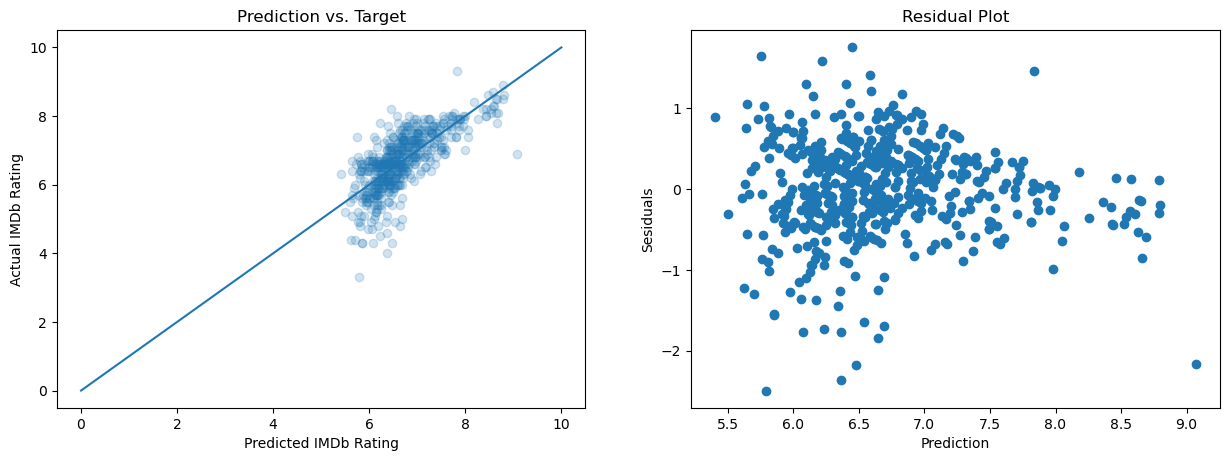

In [35]:
predictions = lm_poly.predict(X_test_poly)
diagnostic_plot(predictions, y_test)

## 3.2. Remove highly correlated 'grossusa' and 'opening' features

In [36]:
# Stats Model
lm = smf.ols('rating ~ raters + budget + grossww + runtime', data=movies)
fit = lm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     429.3
Date:                Sun, 17 Apr 2022   Prob (F-statistic):          1.91e-285
Time:                        14:48:19   Log-Likelihood:                -2725.1
No. Observations:                2654   AIC:                             5460.
Df Residuals:                    2649   BIC:                             5490.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0211      0.081     62.330      0.000       4.863       5.179
raters      1.798e-06   6.92e-08     25.960      0.000    1.66e-06    1.93e-06
budget     -5.599e-09   3.72e-10    -15.036      0.000   -6.33e-09   -4.87e-09
grossww     1.787e-10   8.76e-11      2.041      0.041    6.98e-12     3.5e-10
runtime        0.0140      0.001     18.674      0.000       0.013       0.016
==============================================================================
Omnibus:                      519.702   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1607.714
Skew:                          -0.991   Prob(JB):                         0.00
Kurtosis:                       6.257   Cond. No.                     1.89e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# Create Train & Test Data for our model
X, y = movies[['raters', 'budget', 'grossww', 'runtime']], movies[['rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [38]:
lm, lm_rid, lm_poly, X_test_scaled, X_test_poly = get_reg_results(X_train, X_test, y_train, y_test)

Train --> Linear Regression R-squared: 0.3945
Test --> Linear Regression R-squared: 0.3858

Train --> Ridge Regression R^2: 0.3931
Test --> Ridge Regression R^2: 0.3906

Train --> Degree 2 polynomial regression R-squared: 0.4861
Test --> Degree 2 polynomial regression R-squared: 0.4686


## 3.3. Remove 'budget' feature as well since its correlation with the output is really low

In [39]:
# Create Train & Test Data for our model
X, y = movies[['raters', 'grossww', 'runtime']], movies[['rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [40]:
lm, lm_rid, lm_poly, X_test_scaled, X_test_poly = get_reg_results(X_train, X_test, y_train, y_test)

Train --> Linear Regression R-squared: 0.3402
Test --> Linear Regression R-squared: 0.3436

Train --> Ridge Regression R^2: 0.3389
Test --> Ridge Regression R^2: 0.3457

Train --> Degree 2 polynomial regression R-squared: 0.4142
Test --> Degree 2 polynomial regression R-squared: 0.4308


### **Looks like reducing the existing numerical features did not make any help to improve our model. So we continue with feature engineering steps**

# 4. Feature Engineering

## 4.1. Additional Feature "YearsSinceRelease"

In [41]:
from math import ceil
def get_year_from_release(release_date):
    days_from_release = (datetime.now() - release_date).days
    years_from_release = ceil(days_from_release/365)
    return years_from_release    

In [42]:
movies['YearsSinceRelease'] = movies['release'].apply(lambda x: get_year_from_release(x))
movies.sample(5)

,rating,raters,genres,director,writers,stars,release,origin,language,budget,opening,grossusa,grossww,runtime,production,YearsSinceRelease
title,,,,,,,,,,,,,,,,
The Wolf of Wall Street,8.2,1300000.0,"[Biography, Comedy, Crime, Drama]",Martin Scorsese,"[Terence Winter(screenplay), Jordan Belfort(bo...","[Leonardo DiCaprio, Jonah Hill, Margot Robbie]",2014-02-07,[United States],"[English, French]",100000000.0,18361578.0,116900694.0,392000694.0,180,"[Red Granite Pictures, Appian Way, Sikelia Pro...",9
Tomorrowland,6.4,180000.0,"[Action, Adventure, Family, Fantasy, Mystery, ...",Brad Bird,"[Damon Lindelof(screenplay by), Brad Bird(scre...","[George Clooney, Britt Robertson, Hugh Laurie]",2015-05-22,"[United States, Spain, France, Canada, United ...","[English, French, Japanese]",190000000.0,33028165.0,93436322.0,209035668.0,130,"[Walt Disney Pictures, A113, Babieka]",7
Mortal Engines,6.1,122000.0,"[Action, Adventure, Fantasy, Sci-Fi, Thriller]",Christian Rivers,"[Fran Walsh(screenplay by), Philippa Boyens(sc...","[Hera Hilmar, Robert Sheehan, Hugo Weaving]",2018-12-07,"[United States, New Zealand, Japan]",[English],100000000.0,7559850.0,15951040.0,83869818.0,128,"[Media Rights Capital (MRC), Scholastic Produc...",4
Panic Room,6.8,275000.0,"[Crime, Drama, Thriller]",David Fincher,[David Koepp],"[Jodie Foster, Kristen Stewart, Forest Whitaker]",2002-05-31,[United States],[English],48000000.0,30056751.0,96397334.0,197079546.0,112,"[Columbia Pictures, Hofflund/Polone, Indelible...",20
Shine,7.7,54000.0,"[Biography, Drama, Music, Romance]",Scott Hicks,"[Jan Sardi(screenplay), Scott Hicks(story)]","[Geoffrey Rush, Armin Mueller-Stahl, Justin Br...",1997-03-21,[Australia],"[English, Yiddish]",5500000.0,162179.0,35892330.0,35999081.0,105,"[Australian Film Finance Corporation (AFFC), F...",26


In [43]:
# Create Train & Test Data for our model
X, y = movies[['raters', 'budget', 'opening', 'grossusa', 'grossww', 'runtime', 'YearsSinceRelease']], movies[['rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [44]:
lm, lm_rid, lm_poly, X_test_scaled, X_test_poly = get_reg_results(X_train, X_test, y_train, y_test)

Train --> Linear Regression R-squared: 0.4124
Test --> Linear Regression R-squared: 0.4160

Train --> Ridge Regression R^2: 0.4103
Test --> Ridge Regression R^2: 0.4153

Train --> Degree 2 polynomial regression R-squared: 0.5552
Test --> Degree 2 polynomial regression R-squared: 0.5358


## 4.2. Adding Polynominal Terms

#### We had seen that 'runtime' and 'raters' features had more influence on the rating. So we can try to add polynominals of these features to increase their importance.

In [45]:
movies_poly = movies.copy()

movies_poly['runtime2'] = movies_poly['runtime'] ** 2
movies_poly['raters2'] = movies_poly['raters'] ** 2

In [46]:
movies_poly.head()

,rating,raters,genres,director,writers,stars,release,origin,language,budget,opening,grossusa,grossww,runtime,production,YearsSinceRelease,runtime2,raters2
title,,,,,,,,,,,,,,,,,,
Spider-Man: No Way Home,8.5,570000.0,"[Action, Adventure, Fantasy, Sci-Fi]",Jon Watts,"[Chris McKenna, Erik Sommers, Stan Lee(based o...","[Tom Holland, Zendaya, Benedict Cumberbatch]",2021-12-17,[United States],[English],200000000.0,260138569.0,802704167.0,1.890704e+09,148,"[Columbia Pictures, Pascal Pictures, Marvel St...",1,21904,3.249000e+11
Nightmare Alley,7.1,104000.0,"[Crime, Drama, Thriller]",Guillermo del Toro,"[Guillermo del Toro(screenplay by), Kim Morgan...","[Bradley Cooper, Cate Blanchett, Toni Collette]",2022-02-04,"[United States, Mexico, Canada]","[English, French]",60000000.0,2811703.0,11338107.0,3.869248e+07,150,"[Fox Searchlight Pictures, Searchlight Picture...",1,22500,1.081600e+10
West Side Story,7.3,63000.0,"[Crime, Drama, Musical, Romance]",Steven Spielberg,"[Tony Kushner(screenplay by), Arthur Laurents(...","[Ansel Elgort, Rachel Zegler, Ariana DeBose]",2021-12-10,[United States],"[English, Spanish]",100000000.0,10574618.0,38523412.0,7.554621e+07,156,"[20th Century Studios, Amblin Entertainment, A...",1,24336,3.969000e+09
Dune: Part One,8.1,534000.0,"[Action, Adventure, Drama, Sci-Fi]",Denis Villeneuve,"[Jon Spaihts(screenplay by), Denis Villeneuve(...","[Timothée Chalamet, Rebecca Ferguson, Zendaya]",2021-10-22,"[Canada, United States]","[English, Mandarin]",165000000.0,41011174.0,108315210.0,4.006592e+08,155,"[Warner Bros., Legendary Entertainment, Villen...",1,24025,2.851560e+11
Encanto,7.3,179000.0,"[Animation, Comedy, Family, Fantasy, Musical]",Jared Bush,"[Charise Castro Smith(screenplay by), Jared Bu...","[Stephanie Beatriz(voice), María Cecilia Boter...",2021-11-26,[United States],"[English, Spanish]",50000000.0,27206494.0,96062854.0,2.524794e+08,102,"[Walt Disney Animation Studios, Walt Disney Pi...",1,10404,3.204100e+10


In [47]:
# Create Train & Test Data for our model
X, y = movies_poly[['budget', 'opening', 'grossusa', 'grossww', 'YearsSinceRelease', 'raters2', 'runtime2']], movies_poly[['rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [48]:
lm, lm_rid, lm_poly, X_test_scaled, X_test_poly = get_reg_results(X_train, X_test, y_train, y_test)

Train --> Linear Regression R-squared: 0.3141
Test --> Linear Regression R-squared: 0.3194

Train --> Ridge Regression R^2: 0.3108
Test --> Ridge Regression R^2: 0.3136

Train --> Degree 2 polynomial regression R-squared: 0.3371
Test --> Degree 2 polynomial regression R-squared: 0.3356


#### **Looks like it didn't make any help either :( but let's continue with Dummy variables**

## 4.3. Dummy Variables

### 4.3.1. 'Genre' Dummy Feature

In [49]:
movies_genre_dummies = pd.get_dummies(movies['genres'].apply(pd.Series).stack()).sum(level = 0)
movies_genre_dummies

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
title,,,,,,,,,,,,,,,,,,,,
Spider-Man: No Way Home,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
Nightmare Alley,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
West Side Story,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0
Dune: Part One,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
Encanto,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sanju,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
The Muppet Christmas Carol,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0
Fetih 1453,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0


In [50]:
movies_genre = pd.concat([movies, movies_genre_dummies], axis=1)
movies_genre.drop(['genres', 'language', 'director', 'writers', 'stars', 'release', 'origin', 'production'], axis=1, inplace=True)
movies_genre.head()

,rating,raters,budget,opening,grossusa,grossww,runtime,YearsSinceRelease,Action,Adventure,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
title,,,,,,,,,,,,,,,,,,,,,
Spider-Man: No Way Home,8.5,570000.0,200000000.0,260138569.0,802704167.0,1.890704e+09,148,1,1,1,...,0,0,0,0,0,1,0,0,0,0
Nightmare Alley,7.1,104000.0,60000000.0,2811703.0,11338107.0,3.869248e+07,150,1,0,0,...,0,0,0,0,0,0,0,1,0,0
West Side Story,7.3,63000.0,100000000.0,10574618.0,38523412.0,7.554621e+07,156,1,0,0,...,0,0,1,0,1,0,0,0,0,0
Dune: Part One,8.1,534000.0,165000000.0,41011174.0,108315210.0,4.006592e+08,155,1,1,1,...,0,0,0,0,0,1,0,0,0,0
Encanto,7.3,179000.0,50000000.0,27206494.0,96062854.0,2.524794e+08,102,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [51]:
movies_genre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2654 entries, Spider-Man: No Way Home to Jab Tak Hai Jaan
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             2654 non-null   float64
 1   raters             2654 non-null   float64
 2   budget             2654 non-null   float64
 3   opening            2654 non-null   float64
 4   grossusa           2654 non-null   float64
 5   grossww            2654 non-null   float64
 6   runtime            2654 non-null   int64  
 7   YearsSinceRelease  2654 non-null   int64  
 8   Action             2654 non-null   uint8  
 9   Adventure          2654 non-null   uint8  
 10  Animation          2654 non-null   uint8  
 11  Biography          2654 non-null   uint8  
 12  Comedy             2654 non-null   uint8  
 13  Crime              2654 non-null   uint8  
 14  Drama              2654 non-null   uint8  
 15  Family             2654 non-null   uint8  


In [52]:
# Create Train & Test Data for our model
X, y = movies_genre.iloc[:, 1:], movies_genre[['rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [53]:
lm, lm_rid, lm_poly, X_test_scaled, X_test_poly = get_reg_results(X_train, X_test, y_train, y_test)

Train --> Linear Regression R-squared: 0.5281
Test --> Linear Regression R-squared: 0.4908

Train --> Ridge Regression R^2: 0.5266
Test --> Ridge Regression R^2: 0.4972

Train --> Degree 2 polynomial regression R-squared: 0.6351
Test --> Degree 2 polynomial regression R-squared: 0.5337


In [54]:
lm_pred = lm.predict(X_test)
mse = np.mean((lm_pred - y_test)**2)
print(f"Mean squared error for {lm} is {mse[0]}")

Mean squared error for LinearRegression() is 0.38138446944465465


In [55]:
coeff = pd.DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = pd.Series(lm.coef_[0])
coeff.sort_values('Coefficient Estimate', ascending=False)

,0,Coefficient Estimate
9,Animation,7.682176e-01
13,Drama,3.863005e-01
19,Musical,1.603943e-01
18,Music,1.256294e-01
10,Biography,1.008325e-01
26,Western,9.369284e-02
16,History,7.689924e-02
20,Mystery,1.670939e-02
5,runtime,1.117243e-02
12,Crime,9.507969e-03


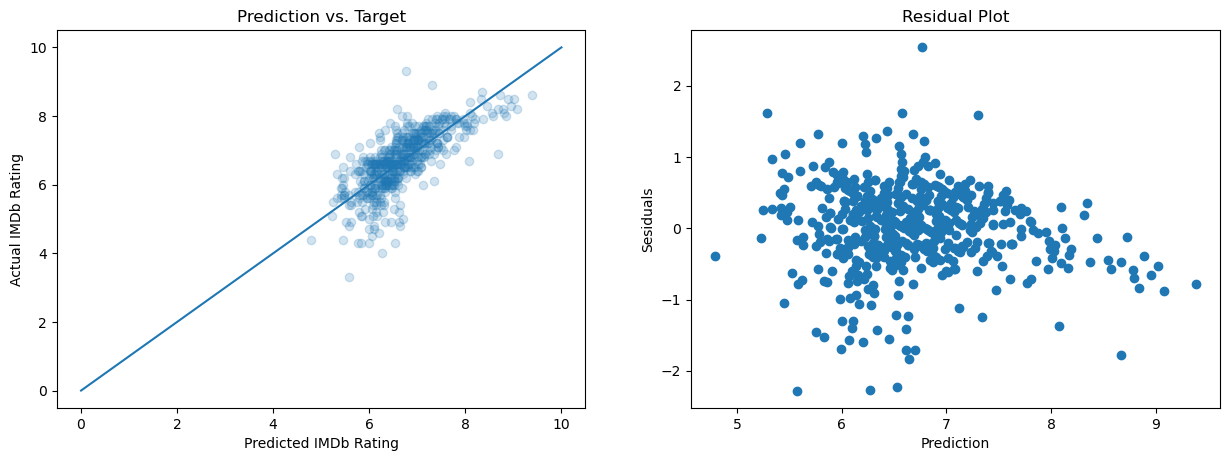

In [56]:
predictions = lm_poly.predict(X_test_poly)
diagnostic_plot(predictions, y_test)

### 4.3.2. 'Stars' Dummy Feature

In [57]:
# Top 10 stars by the count of their appearance in movies
stars = movies.stars.explode()
top10_stars = stars.value_counts()[:10]
top10_stars

Robert De Niro       34
Johnny Depp          34
Mark Wahlberg        33
Samuel L. Jackson    33
Bruce Willis         32
Matt Damon           31
Brad Pitt            31
Nicolas Cage         31
Tom Hanks            30
Denzel Washington    28
Name: stars, dtype: int64

In [58]:
def top_stars(stars):
    star_list = []
    for star in stars:
        if star in top10_stars:
            star_list.append(star)
    if not star_list:
        return None
    else:
        return star_list

In [59]:
movies['top stars'] = movies['stars'].apply(lambda x: top_stars(x))

In [60]:
movies_star_dummies = pd.get_dummies(movies['top stars'].apply(pd.Series).stack()).sum(level = 0)
movies_star_dummies

,Brad Pitt,Bruce Willis,Denzel Washington,Johnny Depp,Mark Wahlberg,Matt Damon,Nicolas Cage,Robert De Niro,Samuel L. Jackson,Tom Hanks
title,,,,,,,,,,
Uncharted,0,0,0,0,1,0,0,0,0,0
Once Upon a Time in... Hollywood,1,0,0,0,0,0,0,0,0,0
Joker,0,0,0,0,0,0,0,1,0,0
Pulp Fiction,0,0,0,0,0,0,0,0,1,0
Fight Club,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
Showtime,0,0,0,0,0,0,0,1,0,0
The Astronaut's Wife,0,0,0,1,0,0,0,0,0,0
The Whole Ten Yards,0,1,0,0,0,0,0,0,0,0


In [61]:
movies_star = pd.concat([movies, movies_star_dummies], axis=1)

In [62]:
movies_star.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2654 entries, Spider-Man: No Way Home to Jab Tak Hai Jaan
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rating             2654 non-null   float64       
 1   raters             2654 non-null   float64       
 2   genres             2654 non-null   object        
 3   director           2654 non-null   object        
 4   writers            2654 non-null   object        
 5   stars              2654 non-null   object        
 6   release            2654 non-null   datetime64[ns]
 7   origin             2654 non-null   object        
 8   language           2654 non-null   object        
 9   budget             2654 non-null   float64       
 10  opening            2654 non-null   float64       
 11  grossusa           2654 non-null   float64       
 12  grossww            2654 non-null   float64       
 13  runtime            2654 non-null  

In [63]:
movies_star.replace(np.nan, 0, inplace=True)

In [64]:
movies_star.drop(['genres', 'director', 'writers', 'stars', 'release', 'origin', 'language', 'production', 'top stars'], axis=1, inplace=True)

In [65]:
movies_star.head()

,rating,raters,budget,opening,grossusa,grossww,runtime,YearsSinceRelease,Brad Pitt,Bruce Willis,Denzel Washington,Johnny Depp,Mark Wahlberg,Matt Damon,Nicolas Cage,Robert De Niro,Samuel L. Jackson,Tom Hanks
title,,,,,,,,,,,,,,,,,,
Spider-Man: No Way Home,8.5,570000.0,200000000.0,260138569.0,802704167.0,1.890704e+09,148,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nightmare Alley,7.1,104000.0,60000000.0,2811703.0,11338107.0,3.869248e+07,150,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
West Side Story,7.3,63000.0,100000000.0,10574618.0,38523412.0,7.554621e+07,156,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dune: Part One,8.1,534000.0,165000000.0,41011174.0,108315210.0,4.006592e+08,155,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Encanto,7.3,179000.0,50000000.0,27206494.0,96062854.0,2.524794e+08,102,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
movies_star.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2654 entries, Spider-Man: No Way Home to Jab Tak Hai Jaan
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             2654 non-null   float64
 1   raters             2654 non-null   float64
 2   budget             2654 non-null   float64
 3   opening            2654 non-null   float64
 4   grossusa           2654 non-null   float64
 5   grossww            2654 non-null   float64
 6   runtime            2654 non-null   int64  
 7   YearsSinceRelease  2654 non-null   int64  
 8   Brad Pitt          2654 non-null   float64
 9   Bruce Willis       2654 non-null   float64
 10  Denzel Washington  2654 non-null   float64
 11  Johnny Depp        2654 non-null   float64
 12  Mark Wahlberg      2654 non-null   float64
 13  Matt Damon         2654 non-null   float64
 14  Nicolas Cage       2654 non-null   float64
 15  Robert De Niro     2654 non-null   float64


In [67]:
# Create Train & Test Data for our model
X, y = movies_star.iloc[:, 1:], movies_star[['rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [68]:
lm, lm_rid, lm_poly, X_test_scaled, X_test_poly = get_reg_results(X_train, X_test, y_train, y_test)

Train --> Linear Regression R-squared: 0.4156
Test --> Linear Regression R-squared: 0.4150

Train --> Ridge Regression R^2: 0.4134
Test --> Ridge Regression R^2: 0.4148

Train --> Degree 2 polynomial regression R-squared: 0.5509
Test --> Degree 2 polynomial regression R-squared: 0.5116


### 4.3.3. 'Directors' Dummy Feature

In [69]:
# Top 10 directors by count
directors = movies.director.explode()
top10_directors = directors.value_counts()[:10]
top10_directors

Steven Spielberg     21
Clint Eastwood       18
Ridley Scott         17
Tim Burton           16
Ron Howard           15
Michael Bay          13
Steven Soderbergh    13
Robert Zemeckis      12
Martin Scorsese      12
Kevin Smith          11
Name: director, dtype: int64

In [70]:
def top_director(director):
        if director in top10_directors:
            return director

In [71]:
movies['top directors'] = movies['director'].apply(lambda x: top_director(x))

In [72]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2654 entries, Spider-Man: No Way Home to Jab Tak Hai Jaan
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rating             2654 non-null   float64       
 1   raters             2654 non-null   float64       
 2   genres             2654 non-null   object        
 3   director           2654 non-null   object        
 4   writers            2654 non-null   object        
 5   stars              2654 non-null   object        
 6   release            2654 non-null   datetime64[ns]
 7   origin             2654 non-null   object        
 8   language           2654 non-null   object        
 9   budget             2654 non-null   float64       
 10  opening            2654 non-null   float64       
 11  grossusa           2654 non-null   float64       
 12  grossww            2654 non-null   float64       
 13  runtime            2654 non-null  

In [73]:
movies_dir_dummies = pd.get_dummies(movies['top directors'])
movies_dir_dummies

,Clint Eastwood,Kevin Smith,Martin Scorsese,Michael Bay,Ridley Scott,Robert Zemeckis,Ron Howard,Steven Soderbergh,Steven Spielberg,Tim Burton
title,,,,,,,,,,
Spider-Man: No Way Home,0,0,0,0,0,0,0,0,0,0
Nightmare Alley,0,0,0,0,0,0,0,0,0,0
West Side Story,0,0,0,0,0,0,0,0,1,0
Dune: Part One,0,0,0,0,0,0,0,0,0,0
Encanto,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
Sanju,0,0,0,0,0,0,0,0,0,0
The Muppet Christmas Carol,0,0,0,0,0,0,0,0,0,0
Fetih 1453,0,0,0,0,0,0,0,0,0,0


In [74]:
movies_director = pd.concat([movies, movies_dir_dummies], axis=1)

In [75]:
movies_director.drop(['genres', 'director', 'writers', 'stars', 'release', 'origin', 'language', 'production', 'top stars', 'top directors'], axis=1, inplace=True)

In [76]:
movies_director.head()

,rating,raters,budget,opening,grossusa,grossww,runtime,YearsSinceRelease,Clint Eastwood,Kevin Smith,Martin Scorsese,Michael Bay,Ridley Scott,Robert Zemeckis,Ron Howard,Steven Soderbergh,Steven Spielberg,Tim Burton
title,,,,,,,,,,,,,,,,,,
Spider-Man: No Way Home,8.5,570000.0,200000000.0,260138569.0,802704167.0,1.890704e+09,148,1,0,0,0,0,0,0,0,0,0,0
Nightmare Alley,7.1,104000.0,60000000.0,2811703.0,11338107.0,3.869248e+07,150,1,0,0,0,0,0,0,0,0,0,0
West Side Story,7.3,63000.0,100000000.0,10574618.0,38523412.0,7.554621e+07,156,1,0,0,0,0,0,0,0,0,1,0
Dune: Part One,8.1,534000.0,165000000.0,41011174.0,108315210.0,4.006592e+08,155,1,0,0,0,0,0,0,0,0,0,0
Encanto,7.3,179000.0,50000000.0,27206494.0,96062854.0,2.524794e+08,102,1,0,0,0,0,0,0,0,0,0,0


In [77]:
movies_director.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2654 entries, Spider-Man: No Way Home to Jab Tak Hai Jaan
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             2654 non-null   float64
 1   raters             2654 non-null   float64
 2   budget             2654 non-null   float64
 3   opening            2654 non-null   float64
 4   grossusa           2654 non-null   float64
 5   grossww            2654 non-null   float64
 6   runtime            2654 non-null   int64  
 7   YearsSinceRelease  2654 non-null   int64  
 8   Clint Eastwood     2654 non-null   uint8  
 9   Kevin Smith        2654 non-null   uint8  
 10  Martin Scorsese    2654 non-null   uint8  
 11  Michael Bay        2654 non-null   uint8  
 12  Ridley Scott       2654 non-null   uint8  
 13  Robert Zemeckis    2654 non-null   uint8  
 14  Ron Howard         2654 non-null   uint8  
 15  Steven Soderbergh  2654 non-null   uint8  


In [78]:
# Create Train & Test Data for our model
X, y = movies_director.iloc[:, 1:], movies_director[['rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [79]:
lm, lm_rid, lm_poly, X_test_scaled, X_test_poly = get_reg_results(X_train, X_test, y_train, y_test)

Train --> Linear Regression R-squared: 0.4160
Test --> Linear Regression R-squared: 0.4185

Train --> Ridge Regression R^2: 0.4138
Test --> Ridge Regression R^2: 0.4181

Train --> Degree 2 polynomial regression R-squared: 0.5029
Test --> Degree 2 polynomial regression R-squared: 0.4090


### 4.3.4. 'Production Co.' Dummy Feature

In [80]:
# Top 10 production companies by count
companies = movies.production.explode()
top10_companies = companies.value_counts()[:10]
top10_companies

Universal Pictures         244
Warner Bros.               233
Columbia Pictures          217
Paramount Pictures         175
Twentieth Century Fox      144
New Line Cinema            134
Walt Disney Pictures       121
Relativity Media            96
Dreamworks Pictures         94
New Regency Productions     77
Name: production, dtype: int64

In [81]:
def top_companies(companies):
    co_list = []
    for company in companies:
        if company in top10_companies:
            co_list.append(company)
    if not co_list:
        return None
    else:
        return co_list

In [82]:
movies['top companies'] = movies['production'].apply(lambda x: top_companies(x))

In [83]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2654 entries, Spider-Man: No Way Home to Jab Tak Hai Jaan
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rating             2654 non-null   float64       
 1   raters             2654 non-null   float64       
 2   genres             2654 non-null   object        
 3   director           2654 non-null   object        
 4   writers            2654 non-null   object        
 5   stars              2654 non-null   object        
 6   release            2654 non-null   datetime64[ns]
 7   origin             2654 non-null   object        
 8   language           2654 non-null   object        
 9   budget             2654 non-null   float64       
 10  opening            2654 non-null   float64       
 11  grossusa           2654 non-null   float64       
 12  grossww            2654 non-null   float64       
 13  runtime            2654 non-null  

In [84]:
movies_co_dummies = pd.get_dummies(movies['top companies'].apply(pd.Series).stack()).sum(level = 0)
movies_co_dummies

,Columbia Pictures,Dreamworks Pictures,New Line Cinema,New Regency Productions,Paramount Pictures,Relativity Media,Twentieth Century Fox,Universal Pictures,Walt Disney Pictures,Warner Bros.
title,,,,,,,,,,
Spider-Man: No Way Home,1,0,0,0,0,0,0,0,0,0
Dune: Part One,0,0,0,0,0,0,0,0,0,1
Encanto,0,0,0,0,0,0,0,0,1,0
Uncharted,1,0,0,0,0,0,0,0,0,0
Scream,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
The Santa Clause 2,0,0,0,0,0,0,0,0,1,0
Nutty Professor II: The Klumps,0,0,0,0,0,0,0,1,0,0
15 Minutes,0,0,1,0,0,0,0,0,0,0


In [85]:
movies_company = pd.concat([movies, movies_co_dummies], axis=1)

In [86]:
movies_company.replace(np.nan, 0, inplace=True)

In [87]:
movies_company.drop(['genres', 'director', 'writers', 'stars', 'release', 'origin', 'language', 'production', 'top stars', 'top directors', 'top companies'], axis=1, inplace=True)

In [88]:
movies_company.head()

,rating,raters,budget,opening,grossusa,grossww,runtime,YearsSinceRelease,Columbia Pictures,Dreamworks Pictures,New Line Cinema,New Regency Productions,Paramount Pictures,Relativity Media,Twentieth Century Fox,Universal Pictures,Walt Disney Pictures,Warner Bros.
title,,,,,,,,,,,,,,,,,,
Spider-Man: No Way Home,8.5,570000.0,200000000.0,260138569.0,802704167.0,1.890704e+09,148,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nightmare Alley,7.1,104000.0,60000000.0,2811703.0,11338107.0,3.869248e+07,150,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
West Side Story,7.3,63000.0,100000000.0,10574618.0,38523412.0,7.554621e+07,156,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Dune: Part One,8.1,534000.0,165000000.0,41011174.0,108315210.0,4.006592e+08,155,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Encanto,7.3,179000.0,50000000.0,27206494.0,96062854.0,2.524794e+08,102,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [89]:
movies_company.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2654 entries, Spider-Man: No Way Home to Jab Tak Hai Jaan
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rating                   2654 non-null   float64
 1   raters                   2654 non-null   float64
 2   budget                   2654 non-null   float64
 3   opening                  2654 non-null   float64
 4   grossusa                 2654 non-null   float64
 5   grossww                  2654 non-null   float64
 6   runtime                  2654 non-null   int64  
 7   YearsSinceRelease        2654 non-null   int64  
 8   Columbia Pictures        2654 non-null   float64
 9   Dreamworks Pictures      2654 non-null   float64
 10  New Line Cinema          2654 non-null   float64
 11  New Regency Productions  2654 non-null   float64
 12  Paramount Pictures       2654 non-null   float64
 13  Relativity Media         2654 non-null   float64


In [90]:
# Create Train & Test Data for our model
X, y = movies_company.iloc[:, 1:], movies_company[['rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [91]:
lm, lm_rid, lm_poly, X_test_scaled, X_test_poly = get_reg_results(X_train, X_test, y_train, y_test)

Train --> Linear Regression R-squared: 0.4450
Test --> Linear Regression R-squared: 0.4367

Train --> Ridge Regression R^2: 0.4430
Test --> Ridge Regression R^2: 0.4384

Train --> Degree 2 polynomial regression R-squared: 0.5772
Test --> Degree 2 polynomial regression R-squared: 0.5104


### 4.3.5. Combination of All Top Dummy Features

In [92]:
movies_all = pd.concat([movies, movies_genre_dummies, movies_star_dummies, movies_dir_dummies, movies_co_dummies], axis=1)

In [93]:
movies_all.drop(['genres', 'director', 'writers', 'stars', 'release', 'origin', 'language', 'production', 'top stars', 'top directors', 'top companies'], axis=1, inplace=True)

In [94]:
movies_all.fillna(0, inplace=True)

In [95]:
movies_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2654 entries, Spider-Man: No Way Home to Jab Tak Hai Jaan
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rating                   2654 non-null   float64
 1   raters                   2654 non-null   float64
 2   budget                   2654 non-null   float64
 3   opening                  2654 non-null   float64
 4   grossusa                 2654 non-null   float64
 5   grossww                  2654 non-null   float64
 6   runtime                  2654 non-null   int64  
 7   YearsSinceRelease        2654 non-null   int64  
 8   Action                   2654 non-null   uint8  
 9   Adventure                2654 non-null   uint8  
 10  Animation                2654 non-null   uint8  
 11  Biography                2654 non-null   uint8  
 12  Comedy                   2654 non-null   uint8  
 13  Crime                    2654 non-null   uint8  


In [96]:
# Create Train & Test Data for our model
X, y = movies_all.iloc[:, 1:], movies_all[['rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [97]:
lm, lm_rid, lm_poly, X_test_scaled, X_test_poly = get_reg_results(X_train, X_test, y_train, y_test)

Train --> Linear Regression R-squared: 0.5497
Test --> Linear Regression R-squared: 0.4998

Train --> Ridge Regression R^2: 0.5479
Test --> Ridge Regression R^2: 0.5076

Train --> Degree 2 polynomial regression R-squared: 0.6573
Test --> Degree 2 polynomial regression R-squared: 0.2661


### 4.3.6. Genre + Top Stars

In [98]:
movies_genre_star = pd.concat([movies, movies_genre_dummies, movies_star_dummies], axis=1)

In [99]:
movies_genre_star.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2654 entries, Spider-Man: No Way Home to Jab Tak Hai Jaan
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rating             2654 non-null   float64       
 1   raters             2654 non-null   float64       
 2   genres             2654 non-null   object        
 3   director           2654 non-null   object        
 4   writers            2654 non-null   object        
 5   stars              2654 non-null   object        
 6   release            2654 non-null   datetime64[ns]
 7   origin             2654 non-null   object        
 8   language           2654 non-null   object        
 9   budget             2654 non-null   float64       
 10  opening            2654 non-null   float64       
 11  grossusa           2654 non-null   float64       
 12  grossww            2654 non-null   float64       
 13  runtime            2654 non-null  

In [100]:
movies_genre_star.drop(['genres', 'director', 'writers', 'stars', 'release', 'origin', 'language', 'production', 'top stars', 'top directors', 'top companies'], axis=1, inplace=True)

In [101]:
movies_genre_star.fillna(0, inplace=True)

In [102]:
# Create Train & Test Data for our model
X, y = movies_genre_star.iloc[:, 1:], movies_genre_star[['rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [103]:
lm, lm_rid, lm_poly, X_test_scaled, X_test_poly = get_reg_results(X_train, X_test, y_train, y_test)

Train --> Linear Regression R-squared: 0.5309
Test --> Linear Regression R-squared: 0.4904

Train --> Ridge Regression R^2: 0.5293
Test --> Ridge Regression R^2: 0.4970

Train --> Degree 2 polynomial regression R-squared: 0.6335
Test --> Degree 2 polynomial regression R-squared: 0.4834


# 5. Regularization

In [104]:
movies.drop(['top stars', 'top directors', 'top companies'], axis=1, inplace=True)

In [105]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2654 entries, Spider-Man: No Way Home to Jab Tak Hai Jaan
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rating             2654 non-null   float64       
 1   raters             2654 non-null   float64       
 2   genres             2654 non-null   object        
 3   director           2654 non-null   object        
 4   writers            2654 non-null   object        
 5   stars              2654 non-null   object        
 6   release            2654 non-null   datetime64[ns]
 7   origin             2654 non-null   object        
 8   language           2654 non-null   object        
 9   budget             2654 non-null   float64       
 10  opening            2654 non-null   float64       
 11  grossusa           2654 non-null   float64       
 12  grossww            2654 non-null   float64       
 13  runtime            2654 non-null  

In [106]:
movies.director

title
Spider-Man: No Way Home                Jon Watts
Nightmare Alley               Guillermo del Toro
West Side Story                 Steven Spielberg
Dune: Part One                  Denis Villeneuve
Encanto                               Jared Bush
                                     ...        
Sanju                            Rajkumar Hirani
The Muppet Christmas Carol          Brian Henson
Fetih 1453                           Faruk Aksoy
Veer-Zaara                           Yash Chopra
Jab Tak Hai Jaan                     Yash Chopra
Name: director, Length: 2654, dtype: object

In [107]:
dummy_list = list(movies.select_dtypes(include =['object']).columns)
#dummies = pd.get_dummies(movies[dummy_list], prefix = dummy_list)

director_dummies = pd.get_dummies(movies['director'])
genre_dummies = pd.get_dummies(movies['genres'].apply(pd.Series).stack()).sum(level = 0)
writer_dummies = pd.get_dummies(movies['writers'].apply(pd.Series).stack()).sum(level = 0)
stars_dummies = pd.get_dummies(movies['stars'].apply(pd.Series).stack()).sum(level = 0)
origin_dummies = pd.get_dummies(movies['origin'].apply(pd.Series).stack()).sum(level = 0)
language_dummies = pd.get_dummies(movies['language'].apply(pd.Series).stack()).sum(level = 0)
company_dummies = pd.get_dummies(movies['production'].apply(pd.Series).stack()).sum(level = 0)


In [108]:
movies.drop(['genres', 'director', 'writers', 'stars', 'release', 'origin', 'language', 'production'], axis = 1, inplace = True)

In [109]:
movies_reg = pd.concat([movies, director_dummies, genre_dummies, writer_dummies, stars_dummies, origin_dummies, language_dummies, company_dummies], axis = 1)

In [110]:
movies_reg.shape

(2654, 10574)

In [111]:
# Create Train & Test Data for our model
X, y = movies_reg.iloc[:, 1:], movies_reg[['rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [112]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print('Train --> Linear Regression R-squared: {:.4f}'.format(lm.score(X_train, y_train)))
print('Test --> Linear Regression R-squared: {:.4f}'.format(lm.score(X_test, y_test)))

Train --> Linear Regression R-squared: 1.0000
Test --> Linear Regression R-squared: 0.2032


In [113]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=0.01, normalize=True)

ridgeReg.fit(X_train,y_train)
ridgeReg.score(X_test, y_test)

0.37069889077450013